Backtesting example
===========
This notebook assumes you have the bitfinex library installed

In [1]:
import sys
sys.path.append('..')
from bitfinex.backtest import data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


fetching data from Quandl
-----------------------------
For better access to Quandl data it is nice to have an API key. Let's see what kind of data Quandl keeps for bitfinex.

In [ ]:
with open('quandl.key', 'r') as f:
    key = f.read().strip()
data.Quandl.search('bitfinex')

Apparently Quandl is offering us only  daily prices. For backtesting it is nice to have higher frequency data. For that, another possible source is bitcoincharts, which provides some nice CSVs: Trade data is delayed by approx. 15 minutes. It will return the 2000 most recent trades.. The CSV to be loaded below is about 50MB in size: http://api.bitcoincharts.com/v1/csv/bitfinexUSD.csv.gz

In [2]:
history = data.CSVDataSource('bitfinexUSD.csv.gz',fields=['unix_time', 'price', 'ammount'])
history.parse_timestamp_column('unix_time',unit='s')
#history = data.pd.read_csv('bitfinexUSD.csv.gz',names=['unix_time', 'price', 'amount'])
#history['time'] = data.pd.to_datetime(history['unix_time'],unit='s')
#history = history.set_index('time')

Let's check how many points we have.

In [3]:
history.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7580349 entries, 2013-03-31 22:07:48 to 2016-01-19 11:48:04
Data columns (total 2 columns):
price      float64
ammount    float64
dtypes: float64(2)
memory usage: 173.5 MB


In [4]:
history.data[-10:]

,price,ammount
unix_time,,
2016-01-19 11:45:24,386.19,2.500000
2016-01-19 11:45:24,386.19,0.500000
2016-01-19 11:45:30,385.84,0.500000
2016-01-19 11:45:37,385.50,0.033696
2016-01-19 11:46:01,385.75,11.390500
2016-01-19 11:46:01,385.75,6.427800
2016-01-19 11:46:27,385.95,1.002004
2016-01-19 11:46:30,385.95,0.373438
2016-01-19 11:46:41,386.00,1.258573


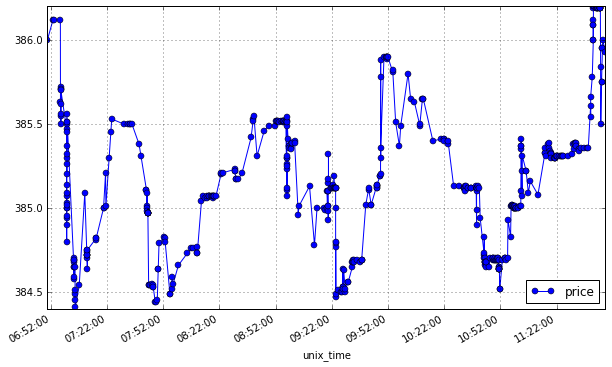

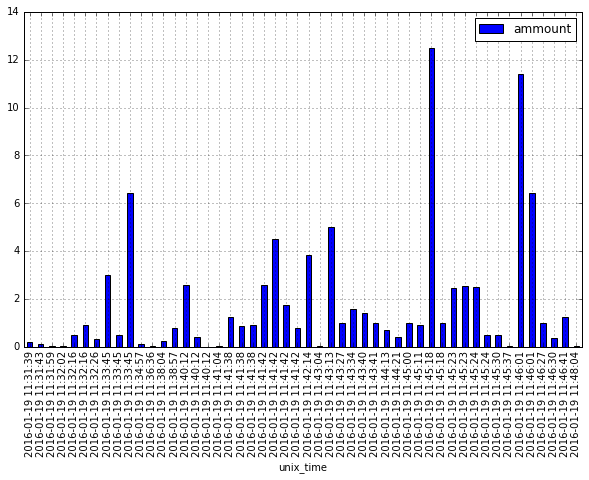

In [5]:
history.data[-500:].plot(y='price',figsize=(10,6), style='-o', grid=True);
history.data[-50:].plot(y='ammount', kind='bar',figsize=(10,6), grid=True);